# compare RMSD of different periods and sites

In [1]:
import pandas as pd
import numpy as np
import pywt
import wavefuncs as wave
import plotter as p

from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from numpy.polynomial import Polynomial as P
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# global plotting settings
plt.style.use('ggplot')
# text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1') 

## Import data and process

In [3]:
df = wave.pd_read_from_drive('FLX_JP-BBY') # read from google drive into pd.DataFrame

In [4]:
df = df.replace(-9999, np.nan) # replace missing with nan
df['date'] = pd.to_datetime(df['TIMESTAMP_START'], format='%Y%m%d%H%M') # parse timestamp to new column 'date'
df = df.set_index(df['date'])

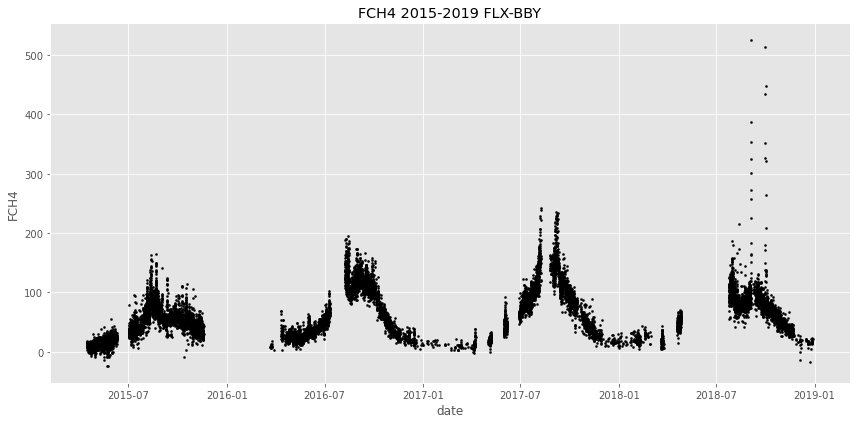

In [5]:
p.date(df.index, df['FCH4'], xlabel='date', ylabel='FCH4', title="FCH4 2015-2019 FLX-BBY")

In [6]:
# 2016, start at August, until May 
dfw = df.loc['2016-08-01':'2017-05-01']
dfw = dfw.loc[dfw['FCH4'].first_valid_index():dfw['FCH4'].last_valid_index()]

dfp16 = wave.wave(dfw) # process to new df
df.loc[dfw.index, 'rmsd'] = dfp16.loc[:, 'rmsd'] # write back to df

In [27]:
# 2017, start at July, until March 
dfw = df.loc['2017-07-01':'2018-03-01']
dfw = dfw.loc[dfw['FCH4'].first_valid_index():dfw['FCH4'].last_valid_index()]

dfp17 = wave.wave(dfw) # process to new df
df.loc[dfw.index, 'rmsd'] = dfp17.loc[:, 'rmsd'] # write back to df

In [28]:
# 2018, trim off Dec and sparse regions in Nov 
dfw = df.loc['2018-08-01':'2018-11-22']
dfw = dfw.loc[dfw['FCH4'].first_valid_index():dfw['FCH4'].last_valid_index()]

dfp18 = wave.wave(dfw) # process to new df
df.loc[dfw.index, 'rmsd'] = dfp18.loc[:, 'rmsd'] # write back to df

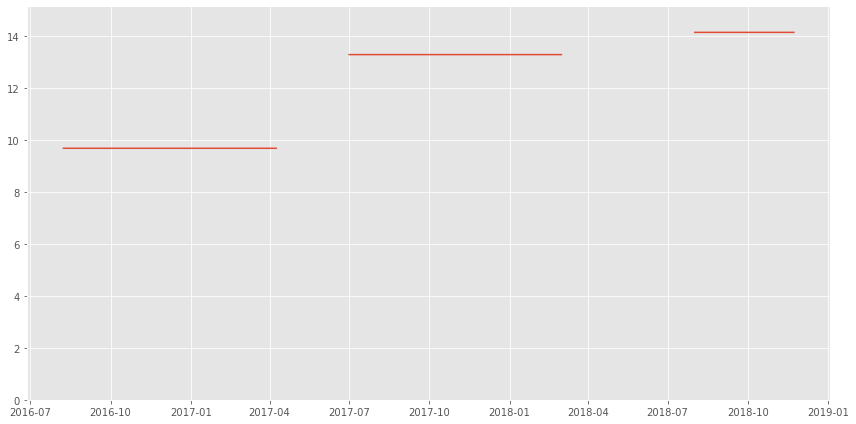

In [34]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(df.index, df.loc[:, 'rmsd'])
ax.set_ylim([0, df.loc[:, 'rmsd'].max() + 1])

plt.tight_layout()